<a href="https://colab.research.google.com/github/Tharun30P/-Road-Safety-using-AI/blob/main/Tharun_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial data shape: (5000, 10)
   Severity           Start_Time Weather_Condition  Visibility(mi)  \
0         3  2022-07-17 10:54:00             Smoke             8.9   
1         4  2022-10-20 18:54:00             Clear             6.6   
2         1  2022-05-08 02:43:00              Snow             6.8   
3         3  2022-04-15 13:35:00              Rain             0.3   
4         3  2022-03-29 02:38:00              Haze             9.9   

   Temperature(F)  Humidity(%)  Pressure(in)  Wind_Speed(mph) State  \
0            75.8         21.8         30.73             23.2    GA   
1            64.1         37.5         28.31              9.6    IL   
2            55.6         28.6         28.84              5.3    TX   
3            75.2         82.8         29.61             18.9    GA   
4            96.3         29.0         30.09              2.7    IL   

              End_Time  
0  2022-07-17 12:20:00  
1  2022-10-20 19:13:00  
2  2022-05-08 02:51:00  
3  2022-04-15 15:14:0

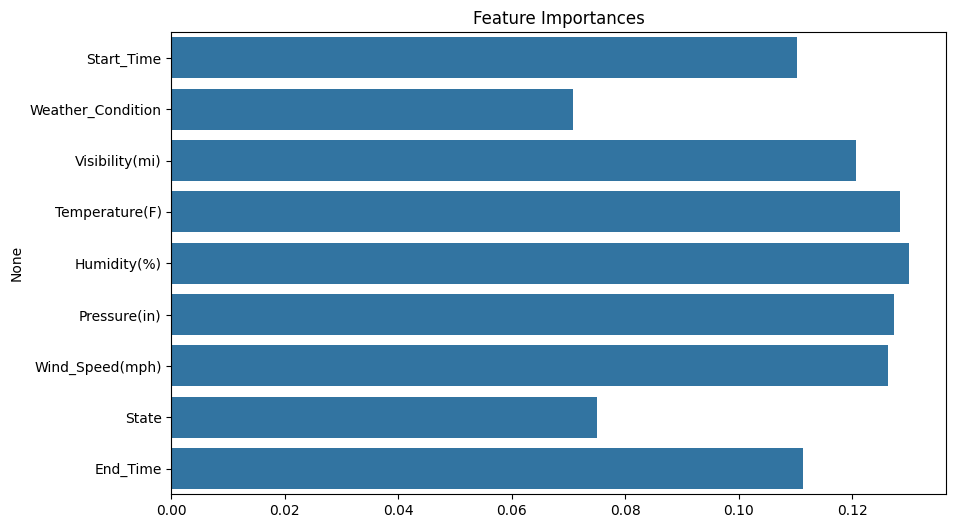

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load dataset
df = pd.read_csv('/content/sample_traffic_accidents_5000.csv')
print("Initial data shape:", df.shape)
print(df.head())

# 2. Basic cleaning
df.dropna(inplace=True)  # Drop missing values for simplicity
print("Data shape after dropping NA:", df.shape)

# 3. Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. Define target and features
# Replace 'Accident_Severity' with the actual name of the severity column in your dataset
target = 'Severity'  # Example: If the column is named 'Severity'
# Check if the target column exists in the DataFrame
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in dataset. Available columns: {df.columns.tolist()}")

X = df.drop(columns=[target])
y = df[target]

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 9. Feature Importance
importances = model.feature_importances_
feat_names = df.drop(columns=[target]).columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.show()